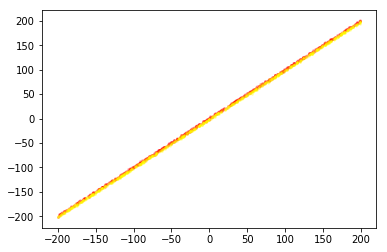

[1, -1, -1]
end


In [31]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return x + 1

def f2(x):
    return x - 1


#generating input data
k = 1000
bound = 200

noise1 = np.random.normal(size = k)        
noise2 = np.random.normal(size = k)        
x1 = np.random.randint(-1 * bound, bound, k)
y1 = f1(x1) + noise1
x2 = np.random.randint(-1 * bound, bound, k)
y2 = f2(x2) + noise2

plt.scatter(x1, y1, c = 'red', s = 3, alpha = 0.2)
plt.scatter(x2, y2, c = 'yellow', s = 3, alpha = 0.2)
plt.show()       

x = []
y = []
for i in range(0, k):
    x.append([x1[i], y1[i]])
    x.append([x2[i], y2[i]])
    y.append(1)
    y.append(-1)

    
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


def grad(x, y, w):
    #l = x.shape[0]
    #arg1 = x.T
    #arg2 = np.subtract(np.dot(x, w), y)
    #return 0.5 * np.dot(arg1, arg2)
    return -1. * y * x

from numpy import linalg as la
from random import randint

class DClassifier(object):
    """docstring"""
 
    def __init__(self):
        """Constructor"""
        pass
    
    def fit(self, x_arr, y_arr):
        x = np.array(x_arr)
        x = x.reshape(x.shape[0], -1)
        l = x.shape[0]
        x_expanded = np.hstack((x, np.ones((l, 1))))
        d = x.shape[1]
        y = np.array(y_arr)
        self.w = np.zeros(d + 1)
        c = 0.5
        eps = 0.001
        iter = 1
    
        while True:
            bad_indices = []
            for i in range (0, l):
                if y[i] * np.dot(x_expanded[i], self.w) < 1:
                    bad_indices.append(i)
            index = randint(0, len(bad_indices) - 1)
            g = grad(x_expanded[bad_indices[index]], y[bad_indices[index]], self.w)
            tmp = g * (c / iter)
            prev = self.w
            self.w = self.w - tmp
            if (la.norm(self.w - prev) <= eps):
                break
            iter += 1
        #return w

        
    def predict(self, x_arr):
        arr = []
        x_expanded = np.hstack((x_arr, np.ones((len(x_arr), 1))))
        for i in range(0, len(x_arr)):
            if (np.dot(x_expanded[i], self.w) >= 0):
                arr.append(1)
            else:
                arr.append(-1)
        return arr

clf = DClassifier()
clf.fit(x_train, y_train)
test = clf.predict([[1, 2], [-1, -2], [50, 49.1]])
print test
print 'end'

In [14]:
#шум добавлять ко второй координате?
#batch = 1 всегда?
#плоскость ~ z = 0 ?